Download the Dataset
Scikit-Learn Library offers a way to download the MNIST dataset using these lines of code:

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

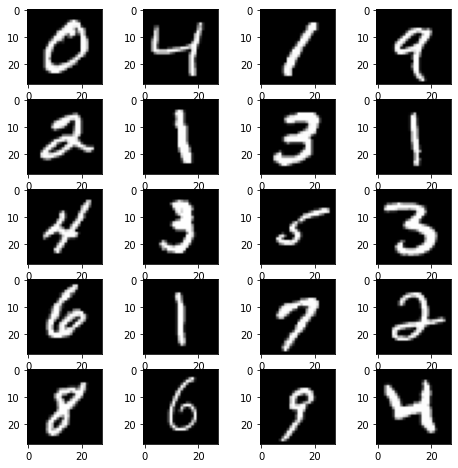

In [23]:
#take a look at the image
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i], cmap = 'gray')
plt.show()

Re-shaping the images
Prepare your dataset.
Write these two lines of code to somewhat normalize your dataset:

x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255
            

In [24]:
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255

Define your Convolutional Neural Network
Build the CNN with the following layers:
The input layer is a 2-D convolutional layer with the following parameters:
28 units;
Convolution window size: 3 x 3; and
Input size: 28 x 28.
Activation function: relu
The first hidden layer is a 2-D max pooling layer with a pool size of 2x2.
The second hidden layer is a flattening layer.
The third hidden layer is a fully-connected layer with:
128 units; and
Activation function: relu.
The output layer is a fully-connected layer with:
10 units; and
Activation function: softmax.

In [25]:
from tensorflow.keras.models import Sequential
model = Sequential()
from tensorflow.keras.layers import Conv2D
model.add(Conv2D(28, (3, 3), input_shape=(28, 28, 1), activation='relu'))

In [26]:
from tensorflow.keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=(2,2)))

In [27]:
from tensorflow.keras.layers import Flatten
model.add(Flatten())

In [28]:
from tensorflow.keras.layers import Dense
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [29]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [30]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1559 - accuracy: 0.9538
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0534 - accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0329 - accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0217 - accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0145 - accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0107 - accuracy: 0.9964
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0059 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0053 - accuracy: 0.9980
Epoch 10/10
313/313 [==============================] - 0s 2ms/step - loss

In [31]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9828
